In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better visualization
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
# Create the DataFrame from the provided data
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'date': ['2023-01-15', '2023-01-18', '2023-01-22', '2023-02-05', '2023-02-14', 
             '2023-03-03', '2023-03-12', '2023-04-01', '2023-04-18', '2023-05-09'],
    'time': ['08:23', '17:45', '12:10', '22:30', '07:15', '15:40', '09:05', '18:20', '23:15', '14:50'],
    'location': ['Main St & 5th Ave', 'Highway 27 NB', 'Oak St & Pine Blvd', 'Interstate 95 exit 42', 
                'Maple Ave & Elm St', 'City Center roundabout', 'River Road mile marker 12', 
                '3rd St & Commerce Ave', 'Highway 101 SB near exit 88', 'Park Blvd & Garden Lane'],
    'accident_type': ['rear-end collision', 'side-swipe', 'T-bone', 'rollover', 'head-on collision',
                     'multi-vehicle', 'single vehicle', 'pedestrian collision', 'hit fixed object', 'angle collision'],
    'vehicles_involved': [2, 3, 2, 1, 2, 4, 1, 1, 1, 2],
    'fatalities': [0, 1, 0, 2, 1, 0, 0, 1, 1, 0],
    'injuries': [2, 4, 3, 1, 2, 6, 1, 0, 0, 2],
    'weather_conditions': ['clear', 'rain', 'foggy', 'clear', 'snow', 'rain', 'clear', 'clear', 'rain', 'cloudy'],
    'road_conditions': ['dry', 'wet', 'dry', 'dry', 'icy', 'wet', 'dry', 'dry', 'wet', 'dry']
}

df = pd.DataFrame(data)

# Display the full dataframe
display(df)

,id,date,time,location,accident_type,vehicles_involved,fatalities,injuries,weather_conditions,road_conditions
0,1,2023-01-15,08:23,Main St & 5th Ave,rear-end collision,2,0,2,clear,dry
1,2,2023-01-18,17:45,Highway 27 NB,side-swipe,3,1,4,rain,wet
2,3,2023-01-22,12:10,Oak St & Pine Blvd,T-bone,2,0,3,foggy,dry
3,4,2023-02-05,22:30,Interstate 95 exit 42,rollover,1,2,1,clear,dry
4,5,2023-02-14,07:15,Maple Ave & Elm St,head-on collision,2,1,2,snow,icy
5,6,2023-03-03,15:40,City Center roundabout,multi-vehicle,4,0,6,rain,wet
6,7,2023-03-12,09:05,River Road mile marker 12,single vehicle,1,0,1,clear,dry
7,8,2023-04-01,18:20,3rd St & Commerce Ave,pedestrian collision,1,1,0,clear,dry
8,9,2023-04-18,23:15,Highway 101 SB near exit 88,hit fixed object,1,1,0,rain,wet
9,10,2023-05-09,14:50,Park Blvd & Garden Lane,angle collision,2,0,2,cloudy,dry


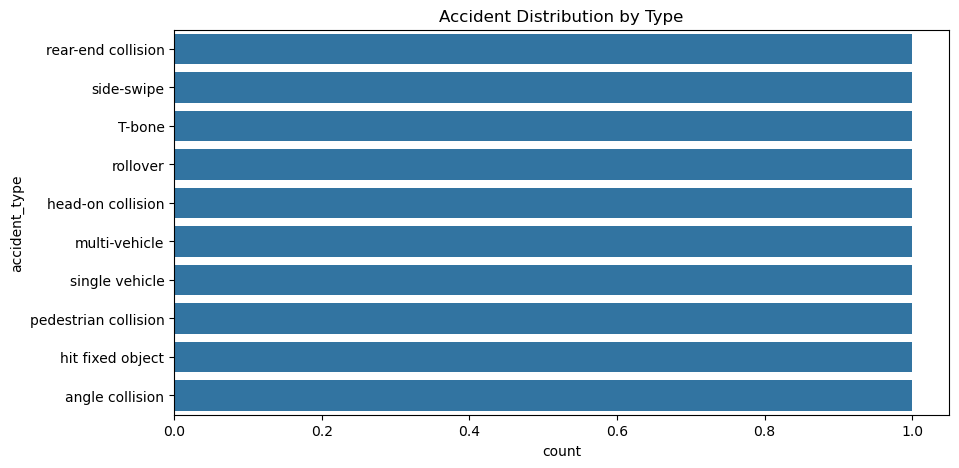

In [4]:
# Accident distribution by type
plt.figure(figsize=(10,5))
sns.countplot(y='accident_type', data=df, order=df['accident_type'].value_counts().index)
plt.title('Accident Distribution by Type')
plt.show()

C:\Users\naikr\AppData\Local\Temp\ipykernel_28228\3983984942.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather_conditions', y='injuries', data=df, estimator=sum, ci=None)


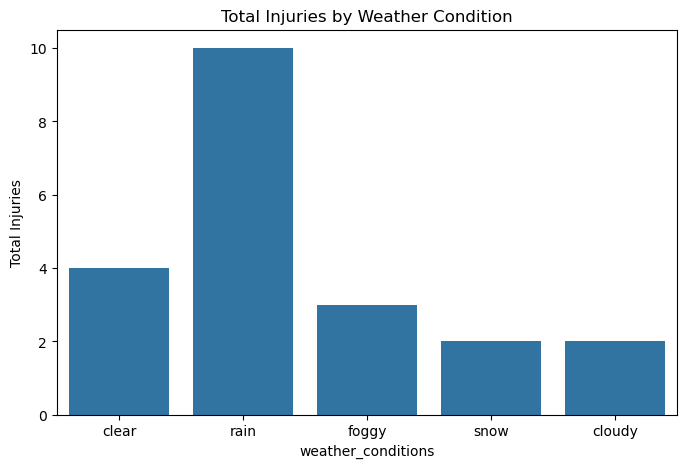

In [5]:
# Injuries by weather condition
plt.figure(figsize=(8,5))
sns.barplot(x='weather_conditions', y='injuries', data=df, estimator=sum, ci=None)
plt.title('Total Injuries by Weather Condition')
plt.ylabel('Total Injuries')
plt.show()

C:\Users\naikr\AppData\Local\Temp\ipykernel_28228\4057628089.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


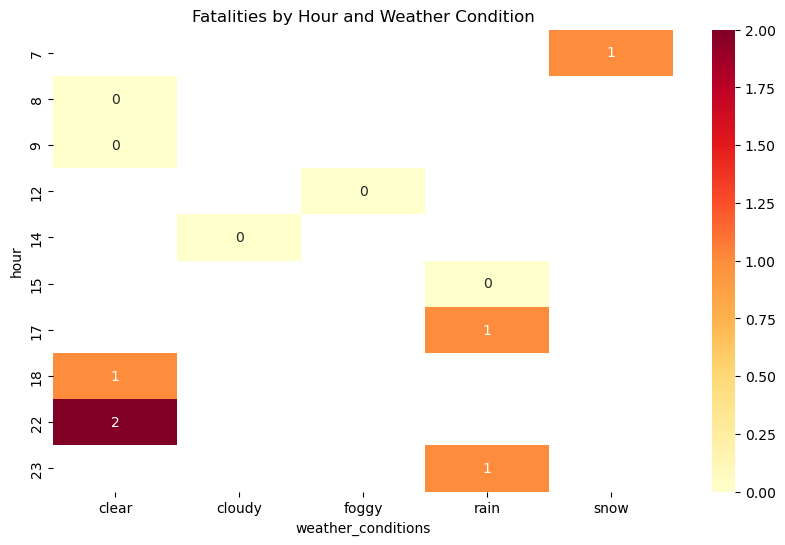

In [6]:
# Time distribution heatmap
# First extract hour from time
df['hour'] = pd.to_datetime(df['time']).dt.hour

plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df['hour'], df['weather_conditions'], 
                      values=df['fatalities'], aggfunc='sum'),
           cmap='YlOrRd', annot=True, fmt='g')
plt.title('Fatalities by Hour and Weather Condition')
plt.show()

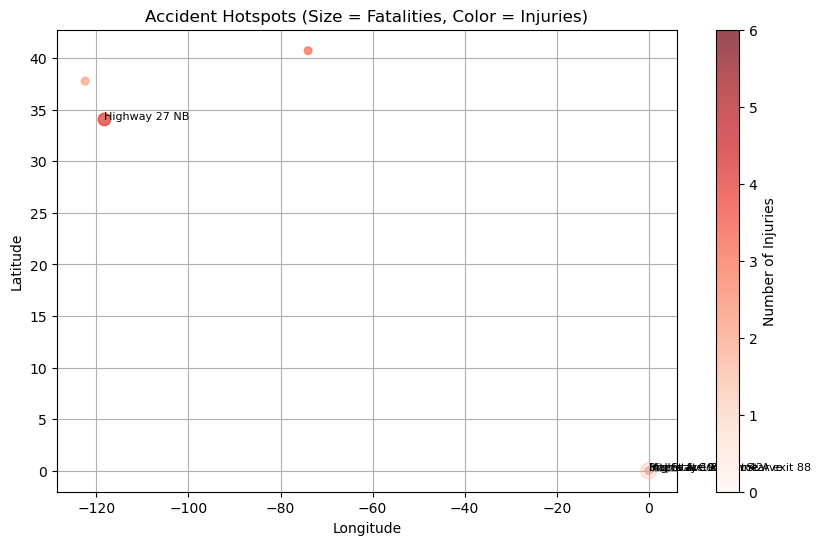

In [8]:
# Simple location plot (no folium needed)
plt.figure(figsize=(10,6))
plt.scatter(df['lon'], df['lat'], 
            s=df['fatalities']*50 + 30,  # Size represents fatalities
            c=df['injuries'],            # Color represents injuries
            cmap='Reds', alpha=0.7)

# Add labels for the worst accidents
for i, row in df[df['fatalities'] > 0].iterrows():
    plt.text(row['lon'], row['lat'], row['location'], fontsize=8)

plt.colorbar(label='Number of Injuries')
plt.title('Accident Hotspots (Size = Fatalities, Color = Injuries)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()